In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

In [2]:
actual_data = pd.read_csv("scenario/case-06/data/150-test-actual.csv")

predict_data = pd.read_csv("scenario/case-06/data/150-test-ft-process.csv")

actual_data = actual_data[["incorrect", "incomplete", "inconsistent"]]
predict_data = predict_data[["incorrect", "incomplete", "inconsistent"]]

In [3]:
for column in actual_data.columns:
    cm = confusion_matrix(actual_data[column], predict_data[column])

    precision = precision_score(actual_data[column], predict_data[column])
    recall = recall_score(actual_data[column], predict_data[column])
    f1 = f1_score(actual_data[column], predict_data[column])
    accuracy = accuracy_score(actual_data[column], predict_data[column])

    print(f"========== {column}:")
    print(cm)
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1: {f1:.3f}")
    print(f"Accuracy: {accuracy:.3f}")
    print()

========== incorrect:
[[ 10   3]
 [ 37 100]]
Precision: 0.971
Recall: 0.730
F1: 0.833
Accuracy: 0.733

========== incomplete:
[[ 13  16]
 [  7 114]]
Precision: 0.877
Recall: 0.942
F1: 0.908
Accuracy: 0.847

========== inconsistent:
[[76 22]
 [33 19]]
Precision: 0.463
Recall: 0.365
F1: 0.409
Accuracy: 0.633



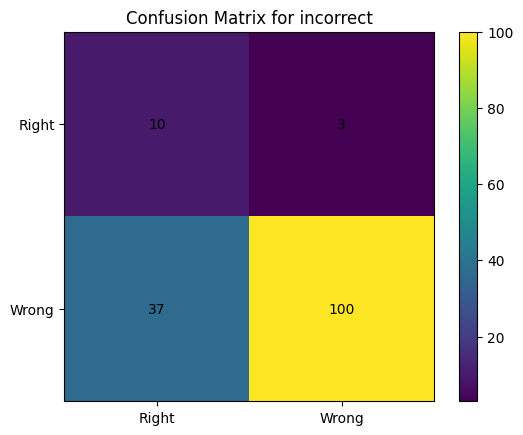

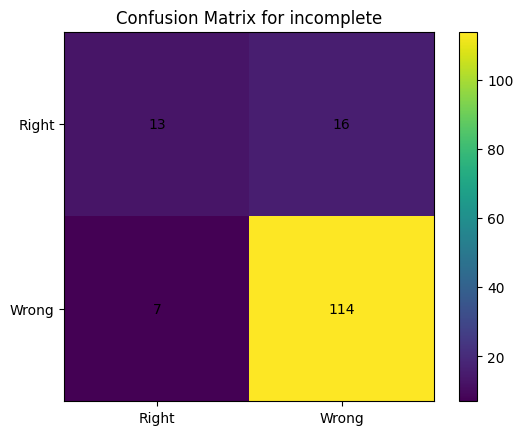

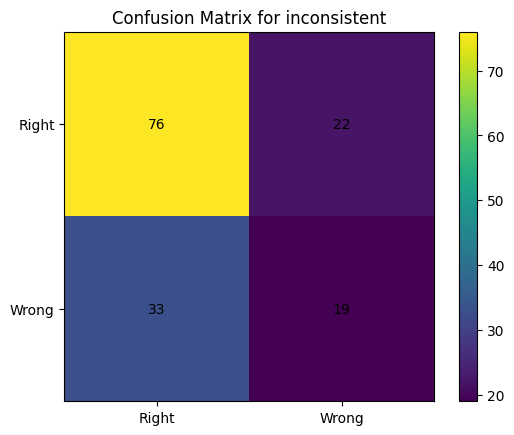

In [4]:
def plot_confusion_matrix(cm, title):
    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()

    classes = ['Right', 'Wrong']
    plt.xticks(range(len(classes)), classes)
    plt.yticks(range(len(classes)), classes)

    for i in range(len(cm)):
        for j in range(len(cm[0])):
            plt.text(j, i, cm[i, j], ha='center', va='center')

    plt.show()

for column in actual_data.columns:
    cm = confusion_matrix(actual_data[column], predict_data[column])
    plot_confusion_matrix(cm, f"Confusion Matrix for {column}")